# Naver Image Handling

In [1]:
import os
from scipy.misc import imread, imresize
cwd = os.getcwd()
print("PACKAGE LOADED")
print("CURRENT FOLDER IS (%s)" % (cwd))

PACKAGE LOADED
CURRENT FOLDER IS (C:\Users\Juno\Desktop\juno_project\Webtoon-Recommender_System)


### RGB2Gray

In [2]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,3], [0.299,0.587,0.114])
    else:
        return rgb

### Load Image
- image resize
- image RGB2Gray or Gray2RGB
- Make the categories with the image's name

In [5]:
# 웹툰 labeling을 위한 dictionary를 만든다.

# Load info
info = pd.read_csv("data_Juno/webtoon_naver_info_by_genres.csv")

# make dict
dic = {}
for i, id in enumerate(info.unique_id):
    dic[id] = i

In [34]:
# 웹툰별로 긁어오기
path = cwd + "./0_img/main_image_naver/gray/"
flist = os.listdir(path)
convert_gray = 0
n_class = len(dic)
imgcnt = 0

for f in flist:
    fullpath = os.path.join(path,f)
    currimg = imread(fullpath)
    if convert_gray:
        img = rgb2gray(currimg)
    else:
        img = currimg
    img = img / 255.
#     print(img.shape)
    # 한 줄로 쭉 펴자
    imgvec = np.reshape(img, (1,-1))
    #labeling
    id_check = int(f.split(".")[0])
    label = dic[id_check]
    curr_label = np.eye(n_class, n_class)[label:label+1, :]
    if imgcnt == 0:
        totalimg = imgvec
        totallabel = curr_label
    else:
        totalimg = np.concatenate((totalimg, imgvec), axis=0)
        totallabel = np.concatenate((totallabel, curr_label), axis=0)
    print("now: %s finished!!:" % imgcnt, end='\r')
    imgcnt += 1
print ("Total %d images loaded." % (imgcnt))
#     imgsmall = imresize(img, [imgsize[0], imgsize[1]]) / 255.
#     print("img shape :",img.shape)
#     print(img)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


Total 745 images loaded.


In [30]:
count = 0
for f in flist:
    fullpath = os.path.join(path,f)
    currimg = imread(fullpath)
    print("file name : ",f, "shape :",currimg.shape)
    if currimg.shape[2] > 3:
        count += 1
count

file name :  103391.png shape : (150, 200, 3)
file name :  103759.png shape : (150, 200, 3)
file name :  105533.png shape : (150, 200, 3)
file name :  112931.png shape : (150, 200, 3)
file name :  112933.png shape : (150, 200, 3)
file name :  113119.png shape : (150, 200, 3)
file name :  113121.png shape : (150, 200, 3)
file name :  113535.png shape : (150, 200, 3)
file name :  113581.png shape : (150, 200, 3)
file name :  113582.png shape : (150, 200, 3)
file name :  113584.png shape : (150, 200, 3)
file name :  113585.png shape : (150, 200, 3)
file name :  113586.png shape : (150, 200, 3)
file name :  113587.png shape : (150, 200, 3)
file name :  113588.png shape : (150, 200, 3)
file name :  119874.png shape : (150, 200, 3)
file name :  131385.png shape : (150, 200, 3)
file name :  132459.png shape : (150, 200, 3)
file name :  137706.png shape : (150, 200, 3)
file name :  137710.png shape : (150, 200, 3)
file name :  140444.png shape : (150, 200, 3)
file name :  142910.png shape : (1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


IndexError: tuple index out of range

**그림자체가 흑백인 경우가 있고, 컬러의 경우엔 rgb 3색이 아닌 4색으로 되어있는 것도 존재...뭐냐..이거**

In [7]:
# 회차별로 긁어오기
path = cwd + "./0_img/chapter_image_naver/color/"
flist = os.listdir(path)
convert_gray = 0
imgsize = [64,64]
n_class = len(dic)
imgcnt = 0
for f in flist:
    fullpath = os.path.join(path,f)
    currimg = imread(fullpath) # shape : (150,200,3)
    if convert_gray:
        img = rgb2gray(currimg)
    else:
        img = currimg
    # Reshape = (64,64)
    imgsmall = imresize(img, [imgsize[0], imgsize[1]]) / 255.
#     print("Imgsmall shape: ",imgsmall.shape)
    imgvec = np.reshape(imgsmall, (1,-1))
#     print("imgvec shape: ", imgvec.shape)
    # label
    id_check = int(f.split("_")[0])
    label = dic[id_check]
    curr_label = np.eye(n_class, n_class)[label:label+1, :]
    if imgcnt == 0:
        totalimg = imgvec
        totallabel = curr_label
    else:
        totalimg = np.concatenate((totalimg, imgvec), axis=0)
        totallabel = np.concatenate((totallabel, curr_label), axis=0)
    print("now: %s finished!!:" % imgcnt, end='\r')
    imgcnt += 1
print ("Total %d images loaded." % (imgcnt))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


ValueError: invalid literal for int() with base 10: '103391.png'

**Image Handling시간이 너무 오래걸린다.**

In [35]:
# train / test set 나누기 
def print_shape(string, x):
    print ("Shape of '%s' is %s" % (string, x.shape,))
    
randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(3*imgcnt/5)]
testidx    = randidx[int(3*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]
print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

Shape of 'trainimg' is (447, 30000)
Shape of 'trainlabel' is (447, 745)
Shape of 'testimg' is (298, 30000)
Shape of 'testlabel' is (298, 745)


#### SAVE Image

In [43]:
data_name = "customset"
savepath = cwd + "./0_img/main_image_naver/gray/data/" + data_name + ".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel
                , testimg=testimg, testlabel=testlabel
                , imgsize=imgsize, use_gray=convert_gray, categories=dic.values)
print ("SAVED TO [%s]" % (savepath))

SAVED TO [C:\Users\Juno\Desktop\juno_project\Webtoon-Recommender_System./0_img/main_image_naver/gray/data/customset.npz]


#### LOAD Image

In [5]:
# Load them!
cwd = os.getcwd()
data_name = "customset"
loadpath = cwd + "./0_img/main_image_naver/gray/data/" + data_name + ".npz"
savepath = cwd + "./0_img/main_image_naver/gray/data/" + data_name + ".npz"
l = np.load(loadpath)

# See what's in here
l.files

# Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']

print ("%d train images loaded" % (trainimg_loaded.shape[0]))
print ("%d test images loaded" % (testimg_loaded.shape[0]))
print ("Loaded from to %s" % (savepath))

447 train images loaded
298 test images loaded
Loaded from to C:\Users\Juno\Desktop\juno_project\Webtoon-Recommender_System./0_img/main_image_naver/gray/data/customset.npz


#### Plot images

(150, 200)


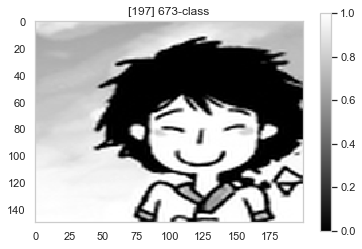

(150, 200)


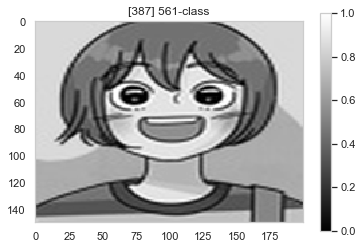

(150, 200)


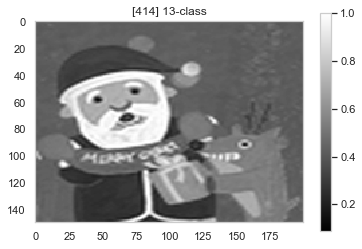

(150, 200)


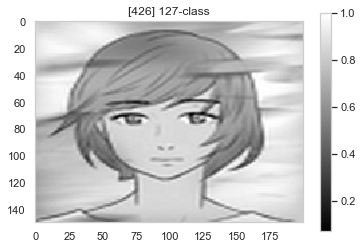

(150, 200)


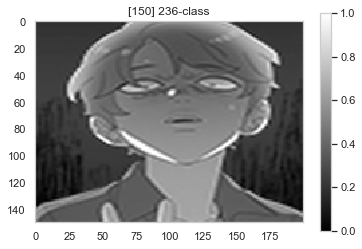

In [51]:
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 5
randidx = np.random.randint(ntrain_loaded, size=batch_size)
imgsize = [150,200]
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    print(currimg.shape)
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    plt.imshow(currimg, cmap=plt.get_cmap('gray'))
    plt.colorbar()
    plt.grid(False)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

#### Image Augmentation
1. augmetation시켜놓고 training
2. CPU단에서 batch 돌릴 때마다 augmentation

In [15]:
from scipy import ndimage
from six.moves import urllib

In [ ]:
# 아예 데이터 늘려버리기
def expand_training_data(images, labels):
    expanded_images = []
    expanded_labels = []
    cnt = 0 # counter
    for x,y in zip(images, labels):
        cnt += 1
        expanded_images.append(x)
        expanded_labels.append(y)
        # median color가  background color라 가정한다...
        bg_value = np.median(x)
        image = np.reshape(x, (-1, 200))
        
        for i in range(4):
            # Rotate image
            angle = np.random.randint(-15,15,1)
            new_img = ndimage.rotate(image, angle, reshape=False, cval=bg_value) # cval : 회전 시 빈공간채울 색깔
            # Shift image
            shift = np.random.randint(-2,2,2)
            new_img_ ndimage.shift(new_img, shift, cval=bg_value)
            # Add it to the list
            expanded_images.append(np.reshape(new_img_,30000))
            expanded_labels.append(y)
    expanded_train_total_data = np.concatenate((expanded_images, expanded_labels), axis=1)
    np.random.shuffle(expanded_train_total_data)
    return expanded_train_total_data

In [30]:
# CPU단에서 batch돌릴때마다 augmentation시키기
def augment_img(xs):
    out = np.copy(xs)
    xs_r = np.reshape(xs, [-1,150,200])
    for i in range(xs_r.shape[0]):
        xs_img = xs_r[i,:, :]
        bg_value = 0
        # Rotate
        angle = np.random.randint(-15,15,1).astype('float')
        xs_img = ndimage.rotate(xs_img, angle, reshape=False, cval=bg_value)
        # Zoom
        rg = 0.1
        zoom_factor = np.random.uniform(1.,1.+rg)
        h, w = xs_img.shape[:2]
        zh   = int(np.round(zoom_factor * h))
        zw   = int(np.round(zoom_factor * w))
        top  = (zh - h) // 2
        left = (zw - w) // 2
        zoom_tuple = (zoom_factor,) * 2 + (1,) * (xs_img.ndim - 2)
        temp = ndimage.zoom(xs_img[top:top+zh, left:left+zw], zoom_tuple)
        trim_top  = ((temp.shape[0] - h) // 2)
        trim_left = ((temp.shape[1] - w) // 2)
        xs_img = temp[trim_top:trim_top+h, trim_left:trim_left+w]
        # SHIFT
        shift = np.random.randint(-3, 3, 2)
        xs_img = ndimage.shift(xs_img, shift, cval=bg_value)
        # RESHAPE
        xs_v = np.reshape(xs_img, [1, -1])
        out[i, :] = xs_v
    return out

C:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


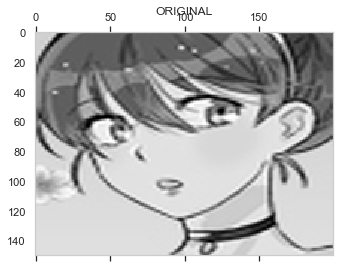

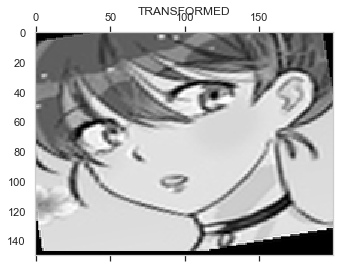

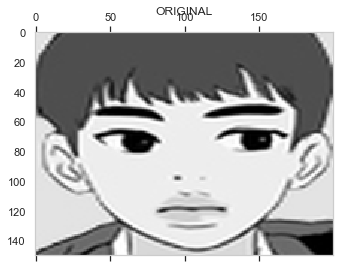

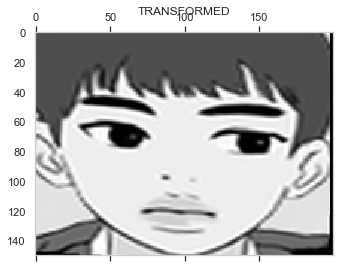

In [31]:
naug = 2
batch_xs = trainimg_loaded[:naug, :]
xs2 = augment_img(batch_xs)
for i in range(naug):
    x1 = batch_xs[i, :].reshape([150,200])
    x2 = xs2[i, :].reshape([150,200])
    plt.matshow(x1, vmin=0, vmax=1, cmap=plt.cm.gray)
    plt.title("ORIGINAL")
    plt.grid(False)
    plt.show()
    plt.matshow(x2, vmin=0, vmax=1, cmap=plt.cm.gray)
    plt.title("TRANSFORMED")
    plt.grid(False)
    plt.show()

### Problem : label당 데이터가 1개, column은 너무 크다.
- label에 비해 데이터수가 너무 적다.
- feature의 크기가 30,000
- 분류하지 않을거면 필요없으려나....